Primeras filas del dataset:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 n

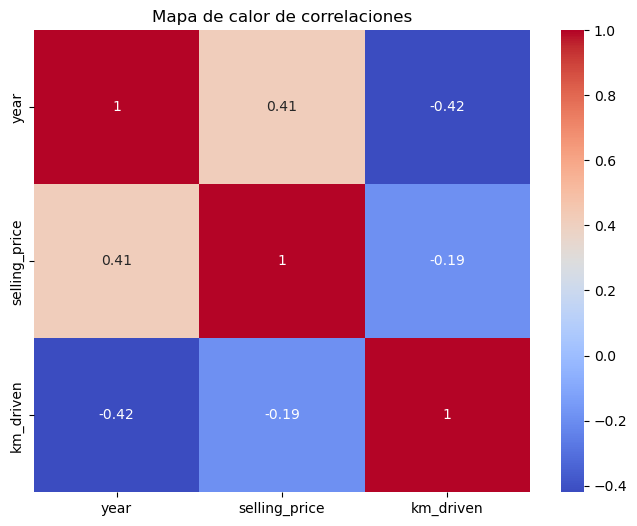

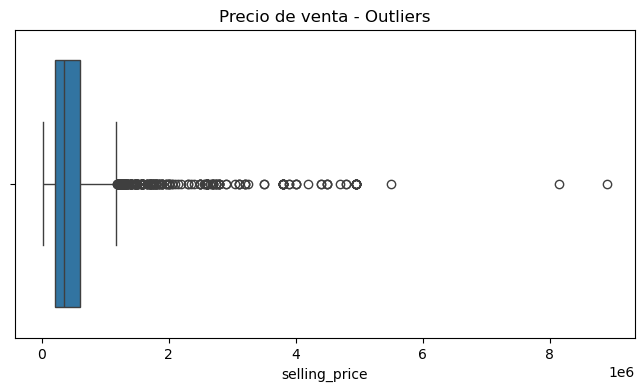

In [3]:
# Importación de librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Cargar el dataset
df = pd.read_csv("C:/Users/BYRON/Downloads/archive/CAR DETAILS FROM CAR DEKHO.csv")

# 1. Análisis exploratorio
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nResumen estadístico:")
print(df.describe())
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nDatos únicos por columna:")
print(df.nunique())

# Gráfico de correlación para variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de calor de correlaciones")
plt.show()

# Boxplot para identificar outliers en 'selling_price'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['selling_price'])
plt.title("Precio de venta - Outliers")
plt.show()


In [5]:
# 2. Preprocesamiento de datos
# Eliminamos columnas que no aportan a la predicción
df = df[df['selling_price'] > 0]  # Eliminamos precios cero
df = df[df['km_driven'] > 0]      # Eliminamos kilometrajes cero

In [18]:
# 3. Selección de características

# Eliminar columna con muchos valores únicos y poco aporte al modelo
df = df.drop('name', axis=1)

# Variable objetivo
Y = df['selling_price']

# Variables predictoras
X = df.drop('selling_price', axis=1)

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Mostrar resultado final
print("Características finales utilizadas para entrenar el modelo:")
print(X.columns)


Características finales utilizadas para entrenar el modelo:
Index(['year', 'km_driven', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


C:\Users\BYRON\AppData\Local\Temp\ipykernel_11168\1174828130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Feature', data=importancia_df, palette='viridis')


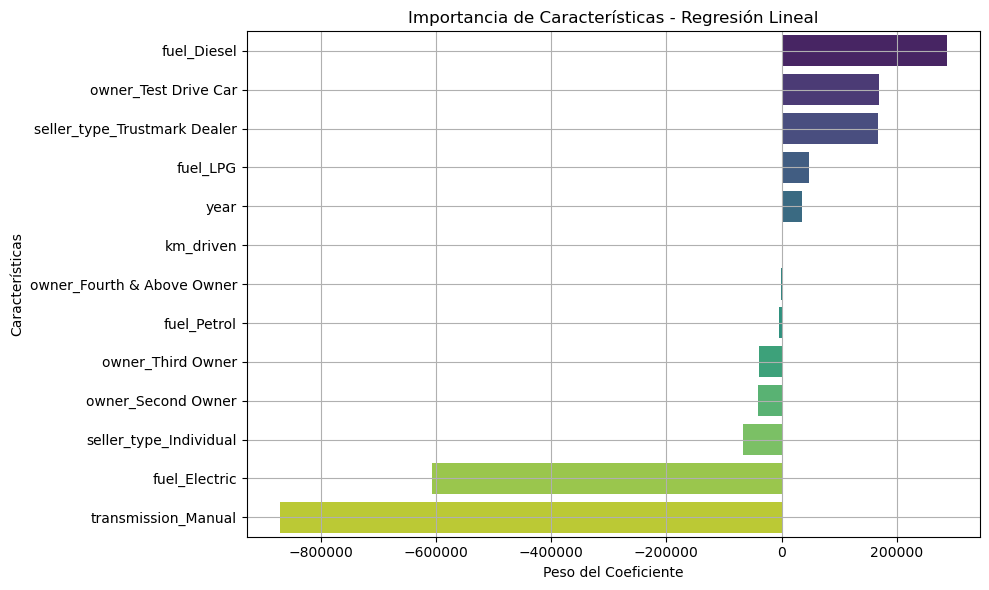

In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, Y)

# Obtener coeficientes
coeficientes = modelo_lineal.coef_
features = X.columns

# Crear DataFrame para graficar
importancia_df = pd.DataFrame({
    'Feature': features,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

# Gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Feature', data=importancia_df, palette='viridis')
plt.title('Importancia de Características - Regresión Lineal')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Características')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# 4. División del dataset
from sklearn.model_selection import train_test_split

# Variable dependiente (lo que queremos predecir)
Y = df['selling_price']  # El precio del carro

# Variables independientes (las características)
X = df.drop(['selling_price'], axis=1)

# Dividir los datos: 80% para entrenamiento, 20% para prueba
# random_state garantiza que la división sea siempre igual si se vuelve a correr
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Mostrar tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento (X_train):", X_train.shape)
print("Tamaño del conjunto de prueba (X_test):", X_test.shape)


Tamaño del conjunto de entrenamiento (X_train): (3472, 6)
Tamaño del conjunto de prueba (X_test): (868, 6)


In [12]:
# 5. Entrenamiento del modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, Y_train)

LinearRegression()

In [24]:
X_test.head(10)


,year,km_driven,fuel,seller_type,transmission,owner
3978,2010,80000,Diesel,Individual,Manual,First Owner
1448,2019,27000,Petrol,Individual,Manual,First Owner
2664,2008,41723,Petrol,Individual,Manual,Second Owner
17,2014,141000,Diesel,Individual,Manual,Second Owner
1634,2016,60000,Diesel,Individual,Automatic,Second Owner
881,2012,19077,Petrol,Individual,Manual,Second Owner
134,2015,14272,Petrol,Dealer,Manual,First Owner
2338,2013,25000,Petrol,Individual,Manual,Second Owner
1992,2016,40000,Diesel,Individual,Manual,Second Owner
2886,2012,42000,Petrol,Dealer,Manual,First Owner


In [14]:
# 6. Evaluación del modelo
Y_pred = modelo_rl.predict(X_test)

print("\nEvaluación del Modelo de Regresión Lineal:")
print("R2 Score:", r2_score(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))



Evaluación del Modelo de Regresión Lineal:
R2 Score: 0.42562645644064845
MAE: 219771.16303492108
RMSE: 416708.3623421093


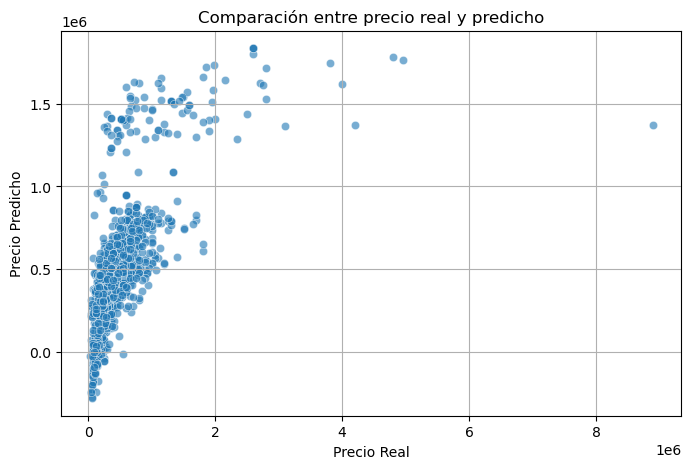

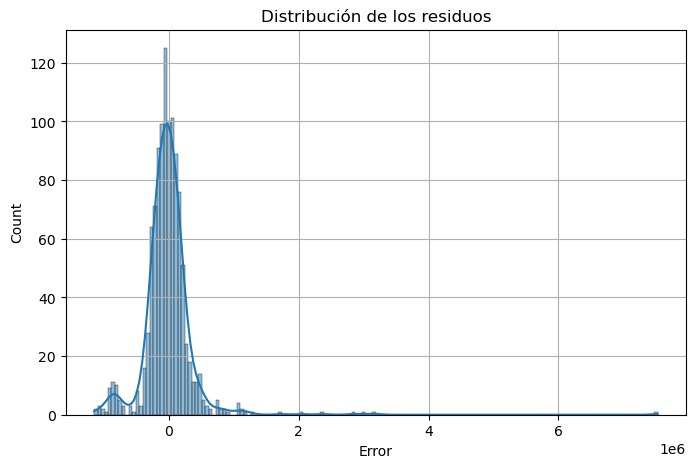

In [16]:
# 7. Gráficas de resultados

# Precio real vs predicho
plt.figure(figsize=(8,5))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre precio real y predicho")
plt.grid(True)
plt.show()

# Histograma de errores (residuos)
residuals = Y_test - Y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Error")
plt.grid(True)
plt.show()